<a href="https://colab.research.google.com/github/ioritzsb/Cocci_on_SiNW/blob/main/Weighted_ColonyCells.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@markdown # Play the cell to import libraries {display-mode: "form"}

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

In [ ]:
# @markdown # Import data
# @markdown Import data for *S. aureus* on colony morphology data on 'Flat' and 'SiNW' surfaces.
# @markdown Full dataset is available on [Github](https://github.com/ioritzsb/Cocci_on_SiNW/blob/main/Data/colony_morphology.csv)
url = 'https://raw.githubusercontent.com/ioritzsb/Cocci_on_SiNW/main/Data/colony_morphology.csv'
df = pd.read_csv(url)
df.head(5)

,Colony,N_cells,Circularity,MaxFeretDiam,InscrCircR,Surface
0,1,5,0.445,3.635,0.704,Flat
1,2,3,0.852,2.216,0.653,Flat
2,3,4,0.633,2.829,0.653,Flat
3,4,1,0.962,1.157,0.503,Flat
4,5,12,0.375,6.460,1.005,Flat


In [ ]:
# @markdown # Filter out colonies with a single cell (N>1)
# @markdown (Do not play this cell if you want to keep colonies with single-cells)
df = df[df['N_cells'] > 1]


In [ ]:
# @markdown # Generate dataframes for flat and SiNW surfaces

#Colonies on flat surfaces
df_f = df[df['Surface'] == 'Flat']
df_f_w = pd.DataFrame()
df_f_w['colony_size'] = df_f['N_cells'].value_counts().index.to_numpy()
df_f_w['counts'] = df_f['N_cells'].value_counts().reset_index(drop=True)
df_f_w['weights'] = df_f_w['colony_size'] * df_f_w['counts']
df_f_w['surface'] = 'Flat'

#Colonies on SiNW
df_sinw = df[df['Surface'] == 'SiNW']
df_sinw_w = pd.DataFrame()
df_sinw_w['colony_size'] = df_sinw['N_cells'].value_counts().index.to_numpy()
df_sinw_w['counts'] = df_sinw['N_cells'].value_counts().reset_index(drop=True)
df_sinw_w['weights'] = df_sinw_w['colony_size'] * df_sinw_w['counts']
df_sinw_w['surface'] = 'SiNW'


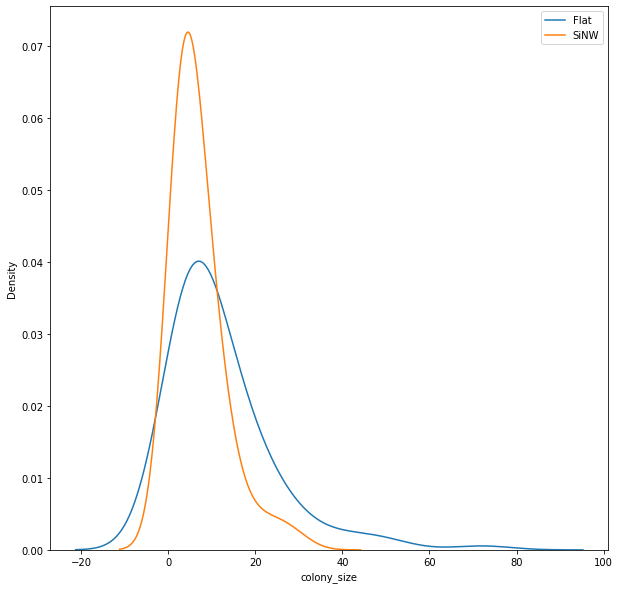

In [ ]:
# @markdown # Plot weighted histograms
ax, fig = plt.subplots(figsize=(10,10))
sns.kdeplot(x='colony_size',weights='weights',  data=df_f_w)
sns.kdeplot(x='colony_size',weights='weights', data=df_sinw_w)
fig.legend(labels=['Flat','SiNW',...])
plt.show()